## Note

This script contains the re-processing step and EDA step 

In order to run this script:

    1. all .wav file should be already processed into .csv file through proj2.ipynb
    2. This script should be in the same folder with all .csv files listed in 'filename' list 
    
The algorithms are performed based on the following assumptions:
    
    1. The wave data (after PDA step) is compressed to a list of 20x4 matrix. 20 rows is chosen by the MFCC normalize algorithm and 4 features is chosen as the component number at PDA step. These two parameters can be modified.
    
    2. The 20x4 matrix is flattened (reshape) to a 80-element list. Data X is a 203 rows of a single column containing a list of 80 element.

In [11]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np
import pandas as pd
import re
%matplotlib inline

In [12]:
filename = ['astronomy_filler','batman_filler','food_filler','forrestgump_filler','greeneggs_filler',
           'hamlet_filler','honorcode_filler','ironman_filler','uh_training','wonka_filler']

In [13]:
def genDataFrame(names,masterDF):
    for file in names:
        df = pd.read_csv(file+'.csv')
        masterDF = pd.concat([masterDF,df])
    #reset indices
    masterDF = masterDF.reset_index(drop=True)
    return masterDF
masterOrig = genDataFrame(filename,pd.DataFrame())
masterOrig.head()
#Change column name 
masterOrig = masterOrig.rename(columns={'Featured Wave': 'Wave'})

In [27]:
print("Number of records:",masterOrig.shape[0])
print("Number of column features:",masterOrig.shape[1])
print("Number of filler records:",masterOrig['is Filler'].sum())

Number of records: 203
Number of column features: 4
Number of filler records: 43


In [15]:
masterOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 4 columns):
Original File    203 non-null object
Chunk Number     203 non-null int64
Wave             203 non-null object
is Filler        203 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


In [16]:
masterOrig['is Filler'].describe()

count    203.000000
mean       0.211823
std        0.409610
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is Filler, dtype: float64

In [17]:
masterOrig.head()

,Original File,Chunk Number,Wave,is Filler
0,astronomy_filler.wav,0,[[ 1.32013088e+01 2.00661330e+00 3.85204320e...,0
1,astronomy_filler.wav,1,[[ 1.27103646e+01 -1.25848366e+00 -2.42411838e...,0
2,astronomy_filler.wav,10,[[ 1.43753951e+01 9.60113177e-01 4.62664491e...,1
3,astronomy_filler.wav,11,[[ 8.58090302e+00 -2.99967944e-02 1.19765435e...,0
4,astronomy_filler.wav,12,[[ 1.24854017e+01 1.24895083e+00 1.59802370e...,0


In [28]:
#Check the feature's data type
type(masterOrig['Wave'].values[0])
#=> Need to convert from string to numpy.array

numpy.ndarray

In [19]:
#Since the value at column "Wave" is string type when converting .csv files to dataframe
#convertString2Array(df,col_name) will convert "Wave" column's values from string back to np.array
import re, ast
def convertString2Array(df,col_name):
    numRows = df.shape[0]
    new_values = []
    #for each row in the given column
    for r in range(numRows):
        #get the original value of cell
        cell = df[col_name].values[r]#df[col_name][r].values[0]
        #convert string to np array
        cell = re.sub("\s+",",",cell)
        cell = cell.replace("[,","[")
        new_cell = np.array(ast.literal_eval(cell))
        #add to a new list
        new_values.append(new_cell)
    #Modify the given column to new values
    df[col_name] = new_values
    return df
masterOrig = convertString2Array(masterOrig,'Wave')

In [20]:
#Check the data type of feature 
print("Type:",type(masterOrig['Wave'].values[0]))
print("Data shape:",masterOrig['Wave'].values[0].shape)

Type: <class 'numpy.ndarray'>
Data shape: (20, 4)


In [22]:
#Since the data is 203 x 20 x 4 (203 matrices of shape 20x4)
#convertSeries2X(df,seriesName)flatten out the matrix and convert 
#203x20x4 to 203x80
def convertSeries2X(df,seriesName):
    new_X = []
    for element in df[seriesName].values:
        new_X.append(element.flatten())
    new_X = np.array(new_X)
    return new_X

In [23]:
X = convertSeries2X(masterOrig,'Wave')
X.shape

(203, 80)

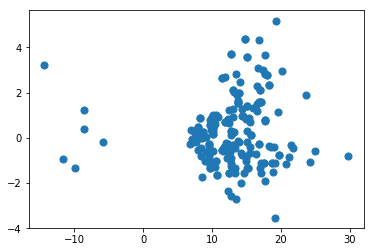

In [26]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis') 
plt.show()  

Comment: The separated 6 dot can be outliers. 